In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
data = pd.read_csv("suv_data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

# Find the mean:
#0 --> purchased
#1 --> not purchased

In [20]:
data.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


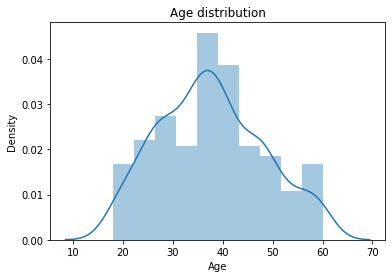

In [32]:
sns.distplot(data["Age"])
plt.title("Age distribution")
plt.show()

Text(0.5, 1.0, 'Gender distribution')

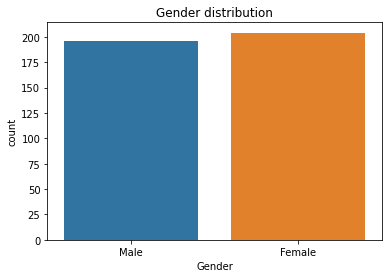

In [39]:
sns.countplot(x="Gender",data=data)
plt.title("Gender distribution")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

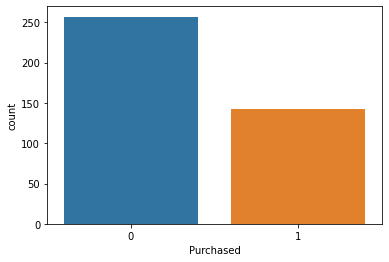

In [40]:
sns.countplot(x="Purchased",data=data)

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x1080 with 0 Axes>

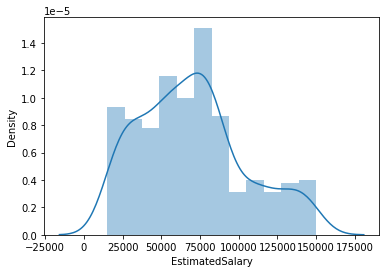

<Figure size 720x1080 with 0 Axes>

In [50]:
sns.distplot(data['EstimatedSalary'])
plt.figure(figsize=(10,15))

# Splitting the data and target

In [64]:
X= data.drop(columns="Purchased",axis=1)
y=data["Purchased"]

In [65]:
print(X)

      User ID  Gender  Age  EstimatedSalary
0    15624510       0   19            19000
1    15810944       0   35            20000
2    15668575       1   26            43000
3    15603246       1   27            57000
4    15804002       0   19            76000
..        ...     ...  ...              ...
395  15691863       1   46            41000
396  15706071       0   51            23000
397  15654296       1   50            20000
398  15755018       0   36            33000
399  15594041       1   49            36000

[400 rows x 4 columns]


In [66]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [60]:
data.replace({'Gender': {'Male':0,'Female':1}}, inplace=True)

In [61]:
data.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
5,15728773,0,27,58000,0
6,15598044,1,27,84000,0
7,15694829,1,32,150000,1
8,15600575,0,25,33000,0
9,15727311,1,35,65000,0


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
standard_data = scaler.fit_transform(X)
print(standard_data)

[[-0.93657932 -1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653 -1.02020406 -0.25358736 -1.46068138]
 [-0.32087714  0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175  0.98019606  1.17910958 -1.46068138]
 [ 0.88695546 -1.02020406 -0.15807423 -1.07893824]
 [-1.36231017  0.98019606  1.08359645 -0.99084367]]


In [68]:
X=standard_data
y=data['Purchased']

In [69]:
print(X)

[[-0.93657932 -1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653 -1.02020406 -0.25358736 -1.46068138]
 [-0.32087714  0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175  0.98019606  1.17910958 -1.46068138]
 [ 0.88695546 -1.02020406 -0.15807423 -1.07893824]
 [-1.36231017  0.98019606  1.08359645 -0.99084367]]


In [70]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [74]:
print(X_train.shape,y_train.shape)

(320, 4) (320,)


In [75]:
model = XGBRegressor()

In [76]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred = model.predict(X_test)

In [78]:
print(y_pred)

[ 1.0542759e+00  1.0126992e+00  1.9082534e-01  1.0037695e-01
  1.4450900e-01  2.8244598e-02  9.7851145e-01  6.3147238e-03
  9.8510258e-02  1.0346017e+00  1.4752552e-03  1.0219194e+00
  9.7548652e-01 -1.6797699e-02  2.0768631e-02 -1.7387329e-02
 -9.4072139e-03 -9.1914153e-03 -9.2705677e-06  7.5662118e-01
 -4.2791307e-02  5.9091425e-01 -2.7919230e-03 -2.4470992e-03
 -7.5167348e-03  9.8849624e-01  9.5581692e-01  1.3093996e-01
  7.5687504e-01 -6.8102470e-03  1.3353797e-02  9.4095516e-01
 -6.5586710e-04  8.1593711e-03  2.4289621e-01  4.0862661e-02
  1.0251014e+00  9.9180436e-01  7.1358639e-03  9.6259278e-01
  7.6869208e-01 -1.1875092e-01  3.9552867e-01  1.9053571e-03
  1.0228763e+00  5.8300188e-03  6.9761038e-01  9.4621062e-01
  9.6150941e-01  8.2831502e-01  2.0444035e-03  9.9826324e-01
 -4.5473939e-03  1.0273027e+00 -9.7310077e-03 -2.3792798e-03
  9.8489112e-01  1.4644919e-03  9.2550546e-01  4.5153019e-03
  7.5094086e-01 -5.3760586e-03 -2.3226137e-03 -3.7574291e-03
  1.4676307e-01  2.91826

In [80]:
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [81]:
print(data)

     Actual  Predicted
379       1   1.054276
103       1   1.012699
301       1   0.190825
75        1   0.100377
123       0   0.144509
..      ...        ...
342       0  -0.042544
160       1   1.004632
68        0   0.018194
281       0   0.003599
99        0   0.002085

[80 rows x 2 columns]
